# matplotlibの高級用法

In [2]:
import numpy as np
import helper.matplotlib
from matplotlib import pyplot as plt

## 座標変換と注釈

一つの図表には複数の座標系と座標変換が関わっており、各種座標系の意味を理解し、その使い方をマスターすることで、matplotlibを使って理想的な図表を自由自在に描くことができます。この節では、図表中の文字、矢印、注釈を例に、各種座標系とその変換について紹介します。

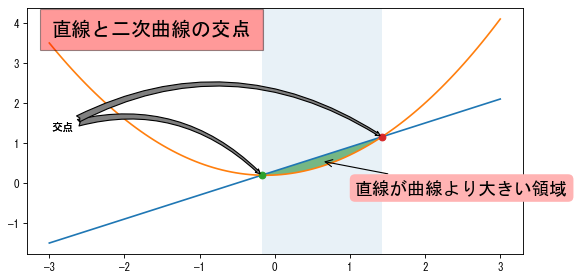

In [27]:
def func1(x): #❶
    return 0.6*x + 0.3

def func2(x): #❶
    return 0.4*x*x + 0.1*x + 0.2
    
def find_curve_intersects(x, y1, y2):
    d = y1 - y2
    idx = np.where(d[:-1]*d[1:]<=0)[0]
    x1, x2 = x[idx], x[idx+1]
    d1, d2 = d[idx], d[idx+1]
    return -d1*(x2-x1)/(d2-d1) + x1

x = np.linspace(-3,3,100) #❷
f1 = func1(x)
f2 = func2(x)
fig, ax = plt.subplots(figsize=(8,4), dpi=80)
ax.plot(x, f1)
ax.plot(x, f2)

x1, x2 = find_curve_intersects(x, f1, f2) #❸
ax.plot(x1, func1(x1), "o") 
ax.plot(x2, func1(x2), "o")

ax.fill_between(x, f1, f2, where=f1>f2, facecolor="green", alpha=0.5) #❹

from matplotlib import transforms
trans = transforms.blended_transform_factory(ax.transData, ax.transAxes)
ax.fill_between([x1, x2], 0, 1, transform=trans, alpha=0.1) #❺

a = ax.text(0.05, 0.95, u"直線と二次曲線の交点",  #❻
    transform=ax.transAxes,
    verticalalignment = "top",
    fontsize = 18,
    bbox={"facecolor":"red","alpha":0.4,"pad":10}
)

arrow = {"arrowstyle":"fancy,tail_width=0.6", 
         "facecolor":"gray", 
         "connectionstyle":"arc3,rad=-0.3"}

ax.annotate(u"交点", #❼
    xy=(x1, func1(x1)), xycoords="data",
    xytext=(0.05, 0.5), textcoords="axes fraction",
    arrowprops = arrow)
                  
ax.annotate(u"交点", #❼
    xy=(x2, func1(x2)), xycoords="data",
    xytext=(0.05, 0.5), textcoords="axes fraction",
    arrowprops = arrow)

xm = (x1+x2)/2
ym = (func1(xm) - func2(xm))/2+func2(xm)
o = ax.annotate(u"直線が曲線より大きい領域", #❼
    xy =(xm, ym), xycoords="data",
    xytext = (30, -30), textcoords="offset points",    
    bbox={"boxstyle":"round", "facecolor":(1.0, 0.7, 0.7), "edgecolor":"none"},
    fontsize=16,
    arrowprops={"arrowstyle":"->"}
)

プログラムの出力は上のグラフのようになります。図中では以下の注釈効果が示されています：

* 二つの小さな円点で直線と曲線の交点を示しています。

* 二つの交点の間で、直線と曲線の間の面積を塗りつぶしています。

* 二つの交点の間の区間を示すために、高さがサブプロット全体の高さで、左右の辺が二つの交点を通る矩形を使用しています。

* 図の左上隅に説明文を配置しています。

* 二つの交点と塗りつぶされた面積に矢印付きの注釈を使用しています。

まず、❶`func1`と`func2`という二つの関数を定義しています。これらはそれぞれ直線と二次曲線を計算する関数です。次に❷これらの関数を区間`(-3, 3)`で計算し、`plot()`を呼び出して曲線図を描画します。

❸二つの交点をマークするために、`find_curve_intersects()`を使用して二つの曲線`f1`と`f2`の交点に対応するX軸座標`x1`と`x2`を計算します。交点の小さな円点は`plot()`を使用して描画され、この時渡されるX-Y軸のデータは単一の数値で、`'o'`をスタイルとして描画します。

:::{admonition} 二つの曲線の交点を計算する方法
:class: note
二つの曲線のY軸座標値`y1`と`y2`が同じX軸座標配列`x`で計算されている場合、それらの交点を簡単に計算できます。まず、二つの曲線のY軸の差`d = y1 - y2`を計算し、符号が反対の連続する二つの差のインデックス`idx`と`idx + 1`を見つけます。直線`(x[idx],d[idx])-(x[idx+1],d[idx+1])`とX軸の交点を計算することで、二つの曲線の交点のX軸座標`xc`を得ることができます。交点のY軸座標を計算するには、`np.interp(xc, x, y1)`を呼び出して曲線を線形補間します。
:::

❹次に、`fill_between()`を呼び出して、X軸上で二つの交点の間、Y軸上で二つの曲線の間の面積部分を描画し、`facecolor`と`alpha`パラメータで塗りつぶしの色と透明度を指定します。`fill_between()`の呼び出しパラメータは以下の通りです：

```python
fill_between(x, y1, y2=0, where=None)
```
    
ここで、`x`パラメータは長さ`N`の配列で、`y1`と`y2`パラメータは長さ`N`の配列または単一の数値です。`y1`または`y2`が単一の数値の場合、それらは長さ`N`で、すべての要素が同じ数値の配列と同等です。`fill_between()`はY軸で`y1`と`y2`の間の部分を塗りつぶします。`where`パラメータが`None`の場合、配列xのすべての要素を塗りつぶします。`where`がブール配列の場合、`True`に対応する部分のみを塗りつぶします。プログラム中の配列`x`の範囲は`(-3, 3)`で、条件`where = f1 > f2`が設定されているため、直線が二次曲線より上にある部分のみを描画します。
    
❺二つの交点の間のX軸上の矩形領域を描画します。❻`text()`を使用して図表に説明文を追加します。❼最後に`annotate()`を使用して、図表に三つの矢印付き注釈を追加します。

プログラムの詳細を本当に理解するためには、まずmatplotlibの座標変換の仕組みを理解する必要があります。

### 四つの座標系

matplotlibで描画される一つの図表には、四つの座標系があります：

* データ座標系：データ空間内の位置を記述する座標系です。例えば、上のグラフの場合、データ座標系の範囲はX軸が`(-3, 3)`、Y軸が`(-2, 5)`です。

* サブプロット座標系：サブプロット内の位置を記述する座標系で、サブプロットの左下隅が`(0, 0)`、右上隅が`(1, 1)`です。

* 図表座標系：一つの図表には複数のサブプロットが含まれ、サブプロットの周りには余白があります。そのため、図表表示領域内の点を記述するために図表座標系が必要です。図表の左下隅が`(0, 0)`、右上隅が`(1, 1)`です。

* ウィンドウ座標系：描画ウィンドウ内のピクセル単位の座標系です。左下隅が`(0, 0)`、右上隅が`(width, height)`で、`width`と`height`はそれぞれピクセル単位の描画ウィンドウの内側の幅と高さで、タイトルバー、ツールバー、ステータスバーなどを含みません。

`Axes`オブジェクトの`transData`属性はデータ座標変換オブジェクトで、`transAxes`属性はサブプロット座標変換オブジェクトです。`Figure`オブジェクトの`transFigure`属性は図表座標変換オブジェクトです。

上記の座標変換オブジェクトの`transform()`メソッドを使用して、この座標系の座標をウィンドウ座標系の座標に変換できます。以下のプログラムは、データ座標系の座標点`(-3, -2)`と`(3, 5)`を描画ウィンドウ内の座標に変換します：

In [32]:
print(type(ax.transData))
ax.transData.transform([(-3,-2), (3,5)])

<class 'matplotlib.transforms.CompositeGenericTransform'>


array([[102.54545455,  26.4       ],
       [553.45454545, 306.4       ]])

以下のプログラムは、サブプロット座標系の座標点`(0, 0)`と`(1, 1)`を描画ウィンドウ内の位置に変換し、結果は上記と同じです。つまり、サブプロットの左下隅の座標`(0, 0)`とデータ座標系の座標`(-3, -2)`は画面上では同じ点です。上のグラフを観察すると、これが正しいことがわかります。

In [33]:
ax.transAxes.transform([(0,0), (1,1)])

array([[ 80. ,  35.2],
       [576. , 281.6]])

最後に、図表座標系の座標点`(0, 0)`と`(1, 1)`を描画ウィンドウ内の位置に変換します。描画領域の幅が640ピクセル、高さが320ピクセルであることがわかります：

In [34]:
fig.transFigure.transform([(0,0), (1,1)])

array([[  0.,   0.],
       [640., 320.]])

座標変換オブジェクトの`inverted()`メソッドを使用して、その逆変換オブジェクトを取得できます。例えば、以下のプログラムは描画ウィンドウ内の座標点`(320, 160)`をデータ座標系の座標に変換します。

In [36]:
inv = ax.transData.inverted()
print(type(inv))
inv.transform((320, 160))

<class 'matplotlib.transforms.CompositeGenericTransform'>


array([-0.10645161,  1.34      ])

読者はプログラムが出力する図表を注意深く観察してください。サブプロットの上下左右の余白は異なるため、描画領域の中心点`(320, 160)`はデータ領域の中心点`(0, 1.5)`ではありません。

`set_xlim()`を呼び出してサブプロットの表示範囲を変更すると、そのデータ座標変換オブジェクトも同時に変更されます：

In [37]:
print(ax.set_xlim(-3, 2)) # X軸の範囲を-3から2に設定
print(ax.transData.transform((3, 5))) # データ座標変換オブジェクトが変更されました

(-3.0, 2.0)
[675.2 306.4]


以下に、上のグラフで矩形区間を描画するプログラムを見てみましょう：

```python
from matplotlib import transforms
trans = transforms.blended_transform_factory(ax.transData, ax.transAxes)
ax.fill_between([x1, x2], 0, 1, transform=trans, alpha=0.1)
```

矩形区間は`fill_between()`を使用して描画されます。描画される矩形の左右の辺が常に二つの交点を通るため、矩形のX軸座標はデータ座標系の座標`x1`と`x2`を使用する必要があります。また、矩形の高さが常にサブプロット全体の高さになるため、矩形のY軸座標はサブプロット座標系の座標0と1を使用する必要があります。

:::{tip}
`axvspan()`と`axhspan()`を使用して、垂直方向と水平方向の区間を簡単に描画できます。
:::

プログラムでは、`blended_transform_factory()`を使用してこの混合座標系を作成します。その二つのパラメータはどちらも座標変換オブジェクトで、最初のパラメータからX軸の座標変換を取得し、二番目のパラメータからY軸の座標変換を取得します。そのため、返される座標変換オブジェクト`trans`はX軸にデータ座標系を使用し、Y軸にサブプロット座標系を使用します。プログラムでは、混合座標変換オブジェクト`trans`を`fill_between()`の`transform`パラメータに渡し、描画される塗りつぶし領域が常に左右の辺が二つの交点を通り、上下の辺がサブプロットの枠上に位置するようにします。

### 座標変換のパイプライン

一つの座標系から別の座標系に変換するには、いくつかのステップが必要です。また、データ座標系は必ずしもデカルト座標系ではなく、極座標系や対数座標系である場合もあります。そのため、座標系の変換は単純な二次元アフィン変換（2D Affine Transformation）ではありません。最も単純な図表座標変換オブジェクト`transFigure`から始めて、matplotlibの座標変換がどのように行われるかを紹介します。

本書で提供されている`GraphvizMPLTransform`を使用して、座標変換オブジェクトを関係図として表示できます。次のグラフは`fig.transFigure`の内部構造を示しています。

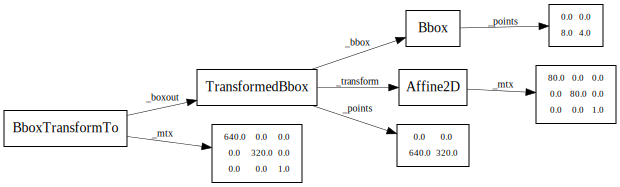

In [38]:
from helper.dot import GraphvizMPLTransform
import graphviz
graphviz.Source(GraphvizMPLTransform.graphviz(fig.transFigure))

この座標変換オブジェクトの内容は少し複雑で、`BboxTransformTo`オブジェクトであり、その中に`TransformedBbox`オブジェクトが含まれています。`TransformedBbox`オブジェクトには`Bbox`オブジェクトと`Affine2D`オブジェクトが含まれています：

* `Bbox`：矩形領域を定義します：`[[x0, y0], [x1, y1]]`。この例では、矩形の二つの頂点座標は`(0, 0)`と`(8 ,4)`で、ウィンドウのインチサイズであり、`figure()`に`figsize`パラメータとして渡されます。

* `Affine2D`：二次元アフィン変換オブジェクトで、行列であり、それと同次ベクトルの積によって変換後の座標が得られます。行列の対角線上以外の値はゼロであるため、このアフィン変換はスケーリング変換のみを行います。座標`(x, y)`を`(80*x, 80*y)`に変換します。

:::{admonition} アフィン変換
:class: note
二次元空間のアフィン変換行列のサイズは$3 \times 3$で、アフィン変換を行うには同次座標を使用する必要があります。つまり、二次元平面上の点`(x, y)`を三次元ベクトル`(x, y, 1)`で表します。アフィン変換はアフィン行列とベクトルの積です。変換行列の最下行の値は常に`(0, 0, 1)`であるため、$2 \times 3$の行列形式で表されることもあります。

$$\begin{pmatrix} x' \\ y' \\ 1 \end{pmatrix} = \begin{pmatrix} a_{00} & a_{01} & b_0 \\ a_{10} & a_{11} & b_1 \\ 0 & 0 & 1 \end{pmatrix} \begin{pmatrix} x \\ y \\ 1 \end{pmatrix}$$
:::

* `TransformedBbox`：矩形領域をアフィン変換した後に新しい矩形領域を取得します。例では、得られた矩形領域の2つの頂点は`(0, 0)`と`(640, 320)`です。重複計算を避けるために、その`_points`属性はこれらの頂点の座標をキャッシュしています。これはちょうどピクセル単位のウィンドウのサイズであるため、アフィン変換行列の数値80は実際には`Figure`オブジェクトの`dpi`属性です。

* `BboxTransformTo`：単位矩形領域から指定された矩形領域への変換です。本例では、矩形領域`(0, 0) - (1, 1)`を矩形領域`(0, 0) - (640, 320)`に変換する座標変換オブジェクトであるため、座標をチャート座標系からウィンドウ座標系の座標に変換できます。その`_mtx`属性はこの変換行列をキャッシュしています。

`fig.transFigure`のアフィン変換オブジェクトは`fig.dpi_scale_trans`で取得できます：

In [39]:
fig.dpi_scale_trans == fig.transFigure._boxout._transform

True

次に、サブプロット座標変換オブジェクトの内容を確認します：

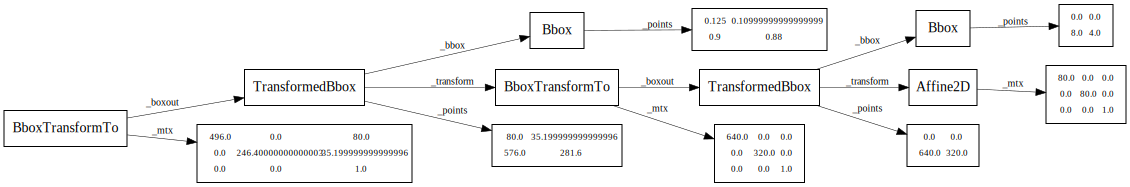

In [40]:
graphviz.Source(GraphvizMPLTransform.graphviz(ax.transAxes))

`ax.transAxes`は`BboxTransformTo`オブジェクトであるため、`(0, 0) - (1, 1)`の領域を別の領域に変換します。この領域は`TransformedBbox`オブジェクトであり、矩形領域`(0.125, 0.1)-(0.9, 0.9)`を`fig.transFigure`で変換した後の領域です。したがって、`transAxes`オブジェクト内部で`transFigure`変換が使用されています：

In [41]:
ax.transAxes._boxout._transform == fig.transFigure

True

この変換中の矩形領域`(0.125, 0.11)-(0.9, 0.88)`はサブプロットのチャート座標系での位置です：

In [43]:
ax.get_position()

Bbox([[0.125, 0.10999999999999999], [0.9, 0.88]])

サブプロットのウィンドウ座標系での矩形領域は：

In [44]:
ax.transAxes._boxout.bounds

(80.0, 35.199999999999996, 496.0, 246.40000000000003)

したがって、`ax.transAxes`は実際には矩形領域`(0, 0)-(1, 1)`を矩形領域`(80.0, 35.2)-(496.0, 246.4)`に変換する座標変換オブジェクトです。

最後に、データ座標系の変換オブジェクト`ax.transData`を観察します。これは`ax.transScale`、`ax.transLimits`、`ax.transAxes`で構成されているため、まず`ax.transLimits`と`ax.transScale`の内容を見てみます。`transLimits`は`BboxTransformFrom`オブジェクトであり、指定された矩形領域を`(0,0)-(1,1)`の矩形領域に変換する変換オブジェクトです。

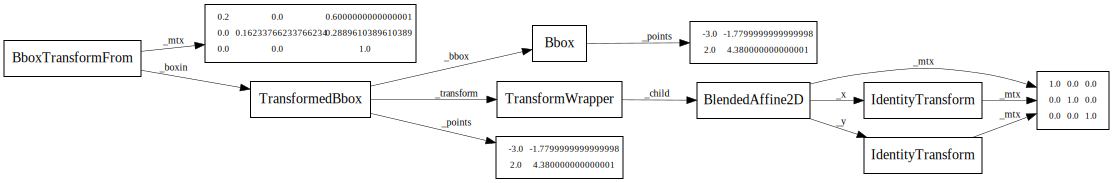

In [45]:
graphviz.Source(GraphvizMPLTransform.graphviz(ax.transLimits))

`transLimits`のソース矩形領域は`TransformedBbox`オブジェクトであり、矩形領域`(-3, -2)-(2, 5)`を座標変換した後の矩形領域です。ここでの変換は`TransformWrapper`オブジェクトで定義されており、上のグラフでは恒等変換です。したがって、`transLimits`の最終的な効果は矩形領域`(-3, 2)-(2, 5)`を矩形領域`(0, 0)-(1, 1)`に変換することです：

In [46]:
print(ax.transLimits.transform((-3, -2)))
print(ax.transLimits.transform((2, 5)))

[ 0.         -0.03571429]
[1.         1.10064935]


矩形領域`(-3, -2)-(2, 5)`はX軸とY軸の表示範囲によって決定されます：

In [47]:
print(ax.get_xlim()) # X軸の表示範囲を取得
print(ax.get_ylim()) # Y軸の表示範囲を取得

(-3.0, 2.0)
(-1.7799999999999998, 4.380000000000001)


`transLimits`はデータ座標系の表示範囲を単位矩形に変換し、`transAxes`は単位矩形をピクセル単位のウィンドウ矩形範囲に変換するため、これらの変換の総合効果はデータ座標をウィンドウ座標に変換することです。2つの変換を「+」で接続して新しい変換オブジェクトを作成できます。例えば、`ax.transLimits + ax.transAxes`はまず`ax.transLimits`変換を行い、次に`ax.transAxes`変換を行うことを示します。変換オブジェクトは生産ライン上の製品のように、座標点を段階的に変換します。以下のプログラムはそれと`ax.transData`の変換結果を比較します：

In [48]:
t = ax.transLimits + ax.transAxes
print(t.transform((0,0)))
print(ax.transData.transform((0,0)))

[377.6 106.4]
[377.6 106.4]


異なる比率の座標軸をサポートするために、`transData`には`transScale`変換も含まれています。つまり、`transData = transScale + transLimits + transAxes`です。本例では`transScale`は恒等変換であるため、`ax.transLimits + ax.transAxes`と`ax.transData`の変換効果は同じです：

In [49]:
ax.transScale

`semilogx()`、`semilogy()`、`loglog()`などのプロット関数を使用して対数座標軸のチャートを描画する場合、または`Axes`の`set_xscale()`と`set_yscale()`メソッドを使用して座標軸を対数座標に設定する場合、`transScale`はもはや恒等変換ではなくなり、その内部構造は次のグラフのようになります。

:::{warning}
本例のX軸の範囲は`(-3,3)`であるため、X軸を対数座標に変更して再描画すると、多くのエラーメッセージが表示されます。
:::

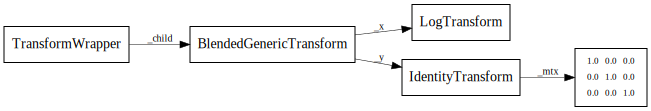

In [50]:
ax.set_xscale("log") # X軸を対数座標に変更
graphviz.Source(GraphvizMPLTransform.graphviz(ax.transScale))

In [51]:
ax.set_xscale("linear") # X軸を線形座標に変更

### シャドウ効果の作成

前節で紹介した座標変換を使用して、シャドウ効果のある曲線を描画します。完全なプログラムは以下の通りで、その効果は次のグラフのようになります。

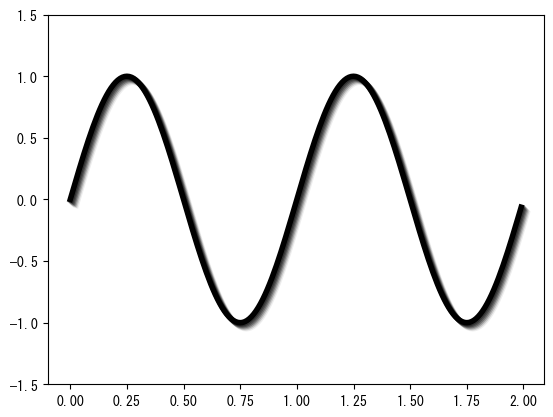

In [52]:
fig, ax = plt.subplots()
x = np.arange(0., 2., 0.01)
y = np.sin(2*np.pi*x)

N = 7 # シャドウの本数
for i in range(N, 0, -1):
    offset = transforms.ScaledTranslation(i, -i, transforms.IdentityTransform()) #❶
    shadow_trans = plt.gca().transData + offset #❷
    ax.plot(x,y,linewidth=4,color="black", 
        transform=shadow_trans,  #❸
        alpha=(N-i)/2.0/N)
    
ax.plot(x,y,linewidth=4,color='black')    
ax.set_ylim((-1.5, 1.5));

まず、ループを使用して透明度とオフセットが徐々に変化するN本の曲線を描画し、その後実際の曲線を描画してシャドウ効果を実現します。

❶`offset`は`ScaledTranslation`オブジェクトであり、最初の2つのパラメータはX軸とY軸のオフセットを決定し、3番目のパラメータは座標変換オブジェクトです。これに変換された後、オフセット変換が行われます。プログラムの3番目のパラメータは恒等変換であるため、`offset`は実際には単純なオフセット変換です：X軸座標に`i`を加え、Y軸座標から`i`を減算します。

以下に、`i`が1の場合の`offset`を示します：

In [53]:
offset.transform((0,0)) # (0,0)を(1,-1)に変換

array([ 1., -1.])

❷シャドウ曲線の座標変換は`shadow_trans`によって行われ、データ座標変換オブジェクト`transData`と`offset`で構成されています。

In [54]:
print(ax.transData.transform((0,0))) # (0,0)をデータ座標変換
print(shadow_trans.transform((0,0))) # (0,0)をデータ座標変換とオフセット変換

[102.54545455 237.6       ]
[103.54545455 236.6       ]


❸最後に、パラメータ`transform`を使用して`shadow_trans`を`plot()`に渡します。`shadow_trans`はデータ座標からウィンドウ座標への変換が完了した後、オフセット変換を行うため、現在のスケールに関係なく、シャドウ効果は常に一貫しています。

### 注釈の追加

`pyplot`モジュールには、テキストを描画する2つの関数が提供されています：`text()`と`figtext()`です。これらはそれぞれ現在の`Axes`オブジェクトと現在の`Figure`オブジェクトの`text()`メソッドを呼び出して描画します。`text()`はデフォルトでデータ座標系にテキストを追加し、`figtext()`はデフォルトでチャート座標系にテキストを追加します。`transform`パラメータを使用してテキストの座標系を変更できます。以下のプログラムは、データ座標系、サブプロット座標系、およびチャート座標系にテキストを追加する方法を示しています。

Text(0.1, 0.92, 'チャート座標系のテキスト')

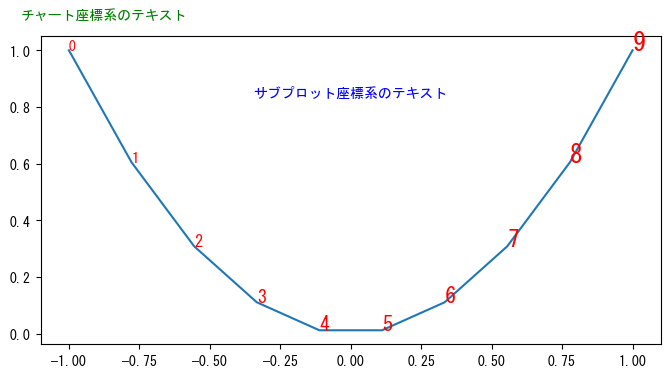

In [55]:
x = np.linspace(-1,1,10)
y = x**2

fig, ax = plt.subplots(figsize=(8,4))
ax.plot(x,y)

for i, (_x, _y) in enumerate(zip(x, y)):
    ax.text(_x, _y, str(i), color="red", fontsize=i+10) #❶

ax.text(0.5, 0.8, u"サブプロット座標系のテキスト", color="blue", ha="center", 
    transform=ax.transAxes) #❷
    
plt.figtext(0.1, 0.92, u"チャート座標系のテキスト", color="green") #❸;

❶`transform`パラメータが設定されていないため、`text()`はデフォルトでデータ座標系にテキストを作成します。ここでは`fontsize`パラメータを使用してテキストのサイズを変更しています。❷`transform`パラメータを使用してテキストの座標変換を`ax.transAxes`に変更しているため、テキストはサブプロット座標系にあります。`ha`パラメータは`'center'`であり、座標点`(0.5, 0.8)`が水平方向にテキストの中心であることを示します。`ha`は`horizontalalignment`の略で、水平方向の配置を意味します。❸`figtext()`を呼び出してチャート座標系にテキストを追加します。

プログラムの出力は上のグラフのようになります。サブプロットの表示範囲を変更するためにズームとパン工具を使用すると、データ座標系のテキストが曲線に追従し、他の2つの座標系のテキストの位置は変わらないことがわかります。プロットウィンドウのツールバーの最後から2番目のアイコンボタンをクリックして「Subplot Configuration Tool」ダイアログを開き、`top`、`right`、`bottom`、`left`などのパラメータを調整すると、サブプロット座標系のテキストも位置を変更し、水平方向ではサブプロットの中心と常に一致します。チャート座標系のテキストの位置は、ウィンドウのサイズを変更した場合にのみ変更されます。

テキストを描画する関数には、テキストや外枠のスタイルを設定するための多くのキーワードパラメータがあります。詳細については、matplotlibのユーザーマニュアルを参照してください。ここでは詳細には触れません。

`pyplot`モジュールの`annotate()`を使用して、矢印付きの注釈テキストを描画します。その呼び出しパラメータは以下の通りです：

```python
annotate(s, xy, xytext=None, xycoords='data', textcoords='data', arrowprops=None, ...)
```

ここで、`s`パラメータは注釈テキスト、`xy`は矢印が指す座標、`xytext`は注釈テキストの座標です。`xycoords`と`textcoords`はそれぞれ矢印座標と注釈テキスト座標の座標変換方法を指定します。

矢印付きの注釈には、矢印が指す座標と注釈テキストの座標の2つの座標が必要です。これらの座標は異なる座標変換を使用できます。パラメータ`xycoords`と`textcoords`は文字列であり、以下のオプションがあります：

| 属性値  | 座標変換方法  |
|:--|:--|
| figure points  | ポイント単位で、チャートの左下隅からの座標  |
| figure pixels    |  ピクセル単位で、チャートの左下隅からの座標   |
| figure fraction  |  チャート座標系の座標   |
|  axes points |   ポイント単位で、サブプロットの左下隅からの座標 |
|  axes pixels |   ピクセル単位で、サブプロットの左下隅からの座標 |
|  axes fraction | サブプロット座標系の座標 |
|  data |          データ座標系の座標 |
|  offset points | ポイント単位で、点xyからの座標 |
|  polar |         データ座標系の極座標  |

ここで、`'figure fraction'`、`'axes fraction'`、`'data'`はそれぞれチャート座標系、サブプロット座標系、データ座標系の座標変換オブジェクトを使用することを示します。チャートとサブプロット座標系は正規化された座標であるため、使用するのが不便です。そのため、チャートとサブプロットにはそれぞれポイント単位とピクセル単位の座標変換方法が提供されています。ポイントとピクセルの単位は似ていますが、チャートのdpi属性値に依存せず、常に1インチあたり72ポイントで計算されます。

上記の座標変換はすべて固定点を原点として変換を行いますが、時には矢印からのオフセットでテキストの座標を指定したい場合があります。その場合は、`'offset points'`オプションを使用できます。

この章先頭のグラフでは、すべての注釈の矢印座標は`'data'`を使用しているため、プロット領域を拡大または移動しても、矢印は常にデータ座標系の固定点を指します。注釈テキスト「交点」の座標変換方法は`'axes fraction'`を使用しているため、「交点」は常にサブプロットの固定位置にあります。「直線が曲線領域より大きい」注釈テキストの座標は`'offset points'`変換を使用しているため、テキストと矢印の相対位置は常に変わりません。

最後に、`arrowprops`パラメータは矢印のスタイルを記述する辞書です。注釈スタイルの詳細な設定については、matplotlibの関連ドキュメントを参照してください。

## テクニック集

最後の節として、いくつかの特別な使い方を紹介します。

### aggバックエンドて描画する

matplotlibが描画するグラフは非常に細やかです。これは、その描画バックエンドライブラリがC++で開発された高品質なアンチエイリアス2D描画ライブラリであるAnti-Grain Geometry (AGG)を使用しているためです。もし2Dグラフィックを描画したいが、matplotlibのグラフ機能が必要ない場合、メモリ内で直接画像を描画し、それをNumPy配列に変換することができます。

以下のコードは`RendererAgg`（キャンバス）をロードし、幅と高さがそれぞれ250ピクセルの`RendererAgg`オブジェクトを作成します。3番目のパラメータはDPIで、このパラメータはキャンバスのサイズに影響しません。`buffer_rgba()`メソッドはキャンバスに保存された描画結果のバッファを取得し、`frombuffer()`を使用してこのバッファをNumPy配列に変換し、キャンバスのサイズに合わせて`reshape()`を呼び出します。最終的に得られる配列`arr`の形状は`(250, 250, 4)`で、2番目の軸の4はキャンバスが4つのチャンネル（赤、緑、青、透明）を持っていることを示します。

In [3]:
import numpy as np
from matplotlib.backends.backend_agg import RendererAgg

w, h = 250, 250
renderer = RendererAgg(w, h, 90)
buf = renderer.buffer_rgba()
arr = np.frombuffer(buf, np.uint8).reshape(h, w, -1)
print(arr.shape)

(250, 250, 4)


`RendererAgg`オブジェクトは、キャンバス上に描画するためのいくつかの`draw_*()`メソッドを提供します。例えば、以下のコードはまず`Path`オブジェクトを作成し、`renderer.draw_path()`を呼び出してキャンバス上にこの`Path`オブジェクトを描画します。最初のパラメータは`GraphicsContextBase`オブジェクトで、線幅や線の色などの描画時の属性を設定するために使用されます。3番目のパラメータは座標変換オブジェクトで、この例では恒等変換を使用します。4番目のパラメータはパスの塗りつぶし色です。

In [4]:
from matplotlib.path import Path
from matplotlib import transforms

path_data = [
    (Path.MOVETO, (179, 1)),
    (Path.CURVE4, (117, 75)),
    (Path.CURVE4, (12, 230)),
    (Path.CURVE4, (118, 230)),
    (Path.LINETO, (142, 187)),
    (Path.CURVE4, (210, 290)),
    (Path.CURVE4, (250, 132)),
    (Path.CURVE4, (200, 105)),
    (Path.CLOSEPOLY, (179, 1)),
]

code, points = zip(*path_data)
path = Path(points, code)

gc = renderer.new_gc()
gc.set_linewidth(2)
gc.set_foreground((1, 0, 0))
gc.set_antialiased(True)
renderer.draw_path(gc, path, transforms.IdentityTransform(), (0, 1, 0))

matplotlibが提供する`Artist`オブジェクトを使用して描画することもできます。以下では、まず`Circle`オブジェクトと`Text`オブジェクトを作成し、それらの`draw()`メソッドを呼び出してキャンバス上に描画します。`Text`オブジェクトは描画時にキャンバスの`dpi`属性を取得する必要があるため、`draw()`を呼び出す前にその`figure`属性を`renderer`に設定します。

In [5]:
from matplotlib.patches import Circle
from matplotlib.text import Text

c = Circle((w/2, h/2), 50, edgecolor="blue", facecolor="yellow", linewidth=2, alpha=0.5)
c.draw(renderer)

text = Text(w/2, h/2, "Circle", va="center", ha="center")
text.figure = renderer
text.draw(renderer)

Notebookで`arr`が表す画像を表示するには、`plt.imsave()`を呼び出すことができます。最初のパラメータはファイル名またはファイルインターフェースを持つオブジェクトで、ここでは`BytesIO`オブジェクトを使用してPNG画像の内容を`png_buf`に保存します。次に、`IPython`の`display_png()`を使用してメモリ内のPNG画像を表示します。

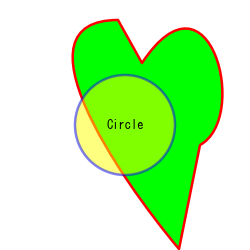

In [6]:
from io import BytesIO
from IPython.display import display_png
png_buf = BytesIO()
plt.imsave(png_buf, arr, format="png")
display_png(png_buf.getvalue(), raw=True)

本書は、画像上に描画するための`ImageDrawer`クラスを提供しています。以下では、`ImageDrawer`を使用して画像上にマーカー、テキスト、直線、円、矩形、および楕円を描画し、本書が提供する`%array_image`マジックコマンドを使用して結果の画像をNotebookに表示します。その結果は次のグラフに示されています。

`ImageDrawer`の`reverse`パラメータはY軸の方向を決定します。デフォルト値は`True`で、Y軸が下向きであり、画像のピクセル座標系の方向と同じです。`False`の場合、Y軸は上向きであり、数学的なデカルト座標系の定義と同じです。

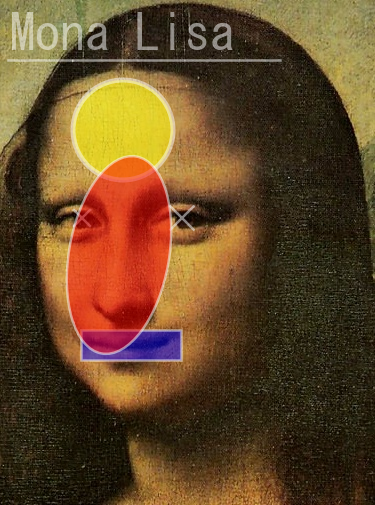

In [11]:
from helper.matplotlib import ImageDrawer
from helper.numpy import array_image

img = plt.imread("data/vinci_target.png")
drawer = ImageDrawer(img)
drawer.set_parameters(lw=2, color="white", alpha=0.5)
drawer.line(8, 60, 280, 60)
drawer.circle(123, 130, 50, facecolor="yellow", lw=4)
drawer.markers("x", [82, 182], [218, 218], [50, 100])
drawer.rectangle(81, 330, 100, 30, facecolor="blue")
drawer.text(10, 50, u"Mona Lisa", fontsize=40)
drawer.ellipse(119, 255, 200, 100, 100, facecolor="red")
array_image(drawer.to_array())

### アニメーション

図形要素のさまざまな属性を変更し、チャートを再描画することで、簡単なアニメーション効果を実現できます。以下の例では：
❶まず、50ミリ秒のタイマー`timer`を作成し、`add_callback()`を呼び出してタイマーイベントを追加します。最初のパラメータはタイマーイベントが発生したときに呼び出される関数で、2番目のパラメータはこの関数に渡されるオブジェクトです。チャート内の曲線のデータを変更する必要があるため、`Line2D`オブジェクト`line`を`update_data()`に渡します。❷`Line2D.set_ydata()`を呼び出して曲線のYデータを設定します。❸`Figure.canvas.draw()`を呼び出してチャート全体を再描画します。

:::{tip}
JupyterLab で `matplotlib` のインタラクティブなグラフを表示するには、以下の手順を実行します。

まず、`ipympl` をインストールします。

```bash
pip install ipympl
```

Notebook のセル内で以下のマジックコマンドを実行します。

```python
%matplotlib ipympl
```
:::

In [8]:
%matplotlib ipympl

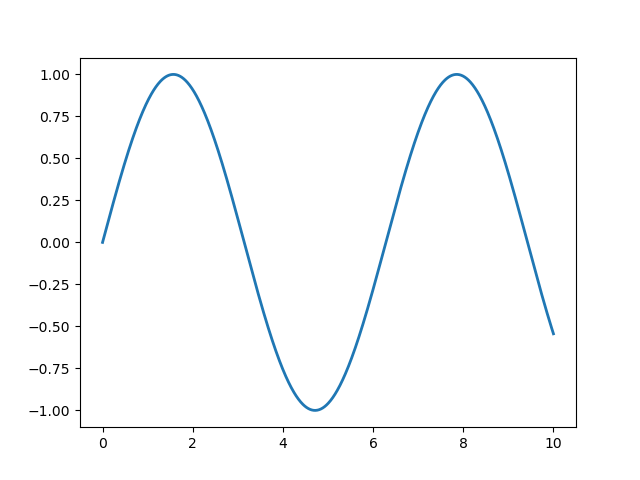

In [12]:
from matplotlib import pyplot as plt
import numpy as np

fig, ax = plt.subplots()
x = np.linspace(0, 10, 1000)
line, = ax.plot(x, np.sin(x), lw=2)

def update_data(line):
    x[:] += 0.1
    line.set_ydata(np.sin(x)) #❷
    fig.canvas.draw()         #❸

timer = fig.canvas.new_timer(interval=50) #❶
timer.add_callback(update_data, line)
timer.start()

次のコードでタイマーを停止させます。

In [13]:
timer.stop()

#### キャッシュで高速に再描画

しかし、`Figure.canvas.draw()`の描画速度は遅いため、再描画速度を向上させるために、チャート内の静的な要素を高速に再描画し、動的な効果を持つ要素のみを更新することができます。以下の例では：

❶図形要素を作成する際に、`animated`属性を`True`に設定します。❷`Figure.canva.draw()`を呼び出してチャート全体を再描画する際に、`animated`が`True`のオブジェクトは無視されます。❸この時点で、すべての静的な要素が描画され、`Figure.canvas.copy_from_bbox()`を呼び出して、サブプロットオブジェクトに対応する領域の画像情報を`background`に保存します。サブプロットオブジェクトの位置とサイズは、その`bbox`属性から取得できます。

タイマーイベント処理関数では、❹まず`Figure.canvas.restore_region()`を呼び出して保存された画像情報を復元します。これは、すべての動的な要素を消去し、すべての静的な要素を再描画することに相当します。❺曲線のY軸データを更新した後、サブプロットオブジェクトの`draw_artist()`を呼び出して、`Canvas`オブジェクト内に曲線を描画します。この時点で、`Canvas`オブジェクト内には完全なチャートの画像が含まれています。❻`Figure.canvas.blit()`を呼び出して、`Canvas`内の指定された領域の内容を画面に描画します。

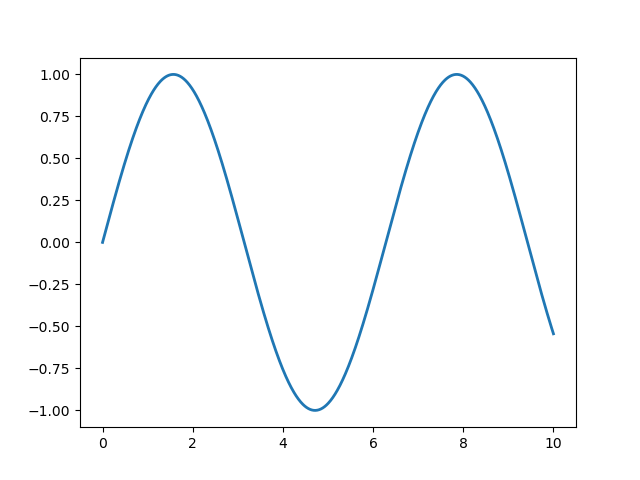

In [14]:
fig, ax = plt.subplots()
x = np.linspace(0, 10, 1000)
line, = ax.plot(x, np.sin(x), lw=2, animated=True) #❶

fig.canvas.draw() #❷
background = fig.canvas.copy_from_bbox(ax.bbox) #❸

def update_data(line):
    x[:] += 0.1
    line.set_ydata(np.sin(x)) 
    fig.canvas.restore_region(background)  #❹
    ax.draw_artist(line)     #❺
    fig.canvas.blit(ax.bbox) #❻

timer = fig.canvas.new_timer(interval=50) 
timer.add_callback(update_data, line)
timer.start()

In [15]:
timer.stop()

#### animationモジュール

前述の2つの簡単な例を通じて、matplotlibでアニメーションを作成する原理を理解しましたが、実際の使用では、`animation`モジュールを使用してアニメーション効果を作成することが一般的です。例えば、`FuncAnimation`オブジェクトは、定期的にユーザー定義の関数を呼び出してチャート内の要素を更新します。

❶曲線オブジェクトを作成する際に、`animated`パラメータを`True`に設定します。❷アニメーションコールバック関数`update_line()`内で、すべてのアニメーション要素のデータを設定します。この関数には現在の表示フレーム数がパラメータとして渡され、ここではフレーム数を使用して波形の位相を変更し、すべてのアニメーション要素を含むシーケンスを返します。❸`FuncAnimation`オブジェクトを作成し、`update_line()`を定期的に呼び出します。`interval`パラメータは1秒あたりのフレーム数で、`blit`が`True`の場合、キャッシュを使用して各フレームの描画を高速化します。`frames`パラメータは最大フレーム数を設定し、`update_line()`のフレーム数パラメータは0から99の間で循環します。

In [17]:
%matplotlib inline

In [23]:
from matplotlib.animation import FuncAnimation
plt.ioff()
fig, ax = plt.subplots()

x = np.linspace(0, 4*np.pi, 200)
y = np.sin(x)
line, = ax.plot(x, y, lw=2, animated=True) #❶

def update_line(i):
    y = np.sin(x + i*2*np.pi/100)
    line.set_ydata(y)
    return [line] #❷

ani = FuncAnimation(fig, update_line, blit=True, interval=25, frames=100) #❸

アニメーションを動画ファイルとして保存するには、以下の方法を呼び出します：

:::{warning}
 matplotlibは、システムにインストールされているビデオ圧縮ソフトウェア（例：`ffmpeg.exe`）を使用してビデオファイルを生成します。ビデオ圧縮ソフトウェアの実行ファイルのパスが`PATH`環境変数に含まれていることを確認してください。
:::

In [24]:
ani.save('sin_wave.mp4', fps=25)

次は作成したアニメーションです。

In [25]:
from IPython.display import Video
Video("sin_wave.mp4", embed=True)